Loading the xslx datafile

In [113]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.patches import Patch
# df = pd.read_excel('error.xlsx', keep_default_na=False, skiprows=2, usecols=lambda x:x!=0) #the use_cols not working hence the second approach

#drop the NaNs leaving the two rows and first column empty then drop the first two rows
df = pd.read_excel('error.xlsx', keep_default_na=False, skiprows=2)

#Update the dataframe to contain all rows (0:,) and all the columns except 0 ([1:])
df = df.iloc[0:, 1:]

#Renaming the first two columns appropriately. df.columns gives us a list of all the columns but when we say [2:] we are picking names from column 2 onwards then appending the first two new names then reassigning this to df.columns to update dataframe
df.columns = ['Season', 'Metric'] + list(df.columns[2:])



#Then forward filling the first column for future filtering purposes. Not working but follow up on it later

# But first, replace empty strings with NaN
df = df.replace('', np.nan)

#Then apply the forward filling
df.iloc[:, 0] = df.iloc[:, 0].fillna(method='ffill')

df #uncomment to see dataframe

,Season,Metric,SBL - previous 14-day demand,SBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand,SBL - forecasted day's Tem (sample 43 locations) and previous 14-day demand,SCBL - previous 14 days AP,SCBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand,SCBL - forecasted day's Tem (sample 43 locations) and previous 14-day demand,PCBL - previous 14 days AP,PCBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand,PCBL - forecasted day's Tem (sample 43 locations) and previous 14-day demand
0,the whole test,RMSE (GW),1.674537,1.579113,1.566955,1.578448,1.599343,1.561649,1.573301,1.509240,1.488962
1,the whole test,MAE (GW),1.238228,1.113013,1.115496,1.174797,1.129107,1.106910,1.139560,1.069872,1.061650
2,the whole test,MAPE (%),0.041975,0.038113,0.037929,0.039840,0.038557,0.037880,0.038637,0.036480,0.036158
3,spring week,RMSE (GW),2.870104,3.074512,2.427218,2.747646,2.834928,2.472189,2.699451,2.707367,2.168724
4,spring week,MAE (GW),2.199146,2.186311,1.918037,2.112561,2.208882,1.982044,2.105088,2.155391,1.744888
5,spring week,MAPE (%),0.084531,0.085170,0.070756,0.080231,0.082504,0.074568,0.081294,0.082324,0.064647
6,summer week,RMSE (GW),1.229366,1.755871,1.319455,1.386289,1.687899,1.586754,0.925119,1.133263,1.138525
7,summer week,MAE (GW),0.908124,1.218687,0.912845,1.048223,1.171242,1.123157,0.609193,0.803125,0.832691
8,summer week,MAPE (%),0.035176,0.045764,0.033898,0.040530,0.043451,0.041304,0.023271,0.030425,0.032215
9,fall week,RMSE (GW),1.185631,1.555940,1.775803,0.951663,1.348335,1.375747,1.386728,1.393038,1.176861


SECTION A: HEATMAPS

Root Mean Square Error

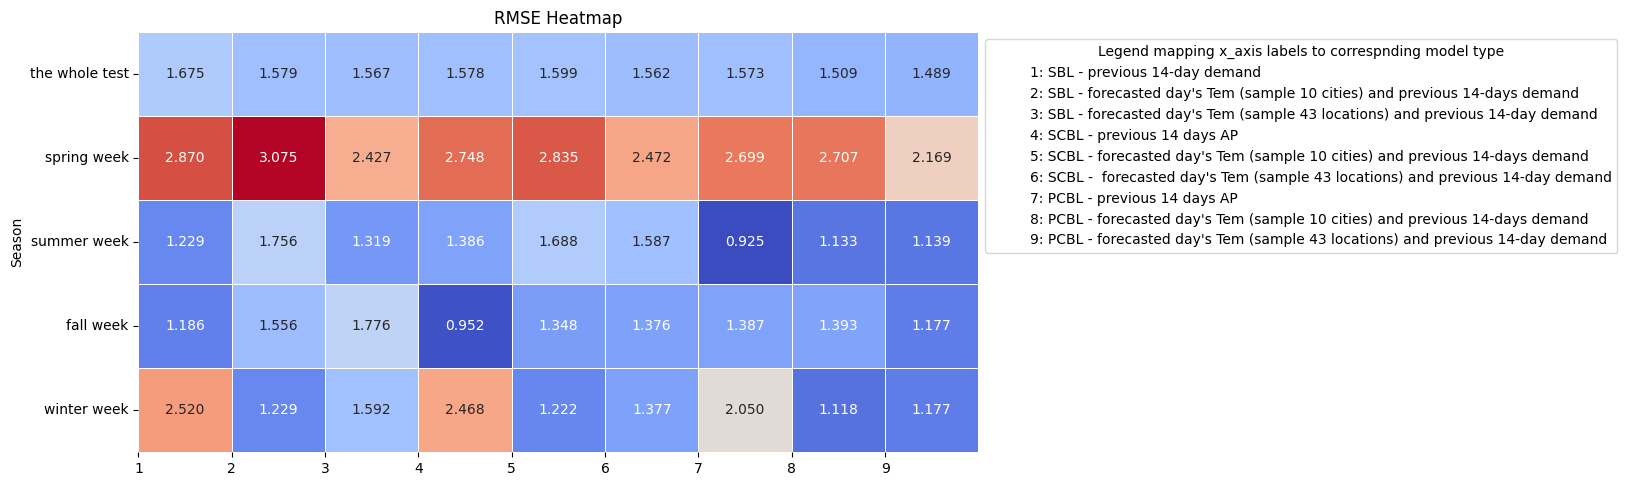

In [114]:
#Extracting RMSE data and saving it on a separate dataframe
rmse_df = df[df['Metric'].str.contains('RMSE')]
# Drop the metric column
rmse_df = rmse_df.drop(rmse_df.columns[1], axis=1)
# Set the 'Season' column as the index
rmse_df.set_index('Season', inplace=True)

#Extract the column names to create a legend hence proper image
df_columns = list(rmse_df.columns)

# Create the heatmap using fig, ax with a larger canvas
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

# Customize the size and position of the heatmap within the axes
ax.set_position([0.1, 0.2, 0.7, 0.7])  # [left, bottom, width, height]

# Customize the heatmap using Seaborn
heatmap = sns.heatmap(rmse_df, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5, cbar = False, ax = ax,cbar_kws={'shrink': 0.3,'pad': 0.02,})

# Set numeric labels on the x-axis
ax.set_xticks(range(len(rmse_df.columns)))
ax.set_xticklabels(range(1, len(rmse_df.columns) + 1), rotation=0, ha = 'center')

# Create a custom legend to map numeric labels to string labels
legend_elements = [Patch(facecolor='white', edgecolor='white', label=f"{i + 1}: {col}") for i, col in enumerate(rmse_df.columns)]
ax.legend(handles=legend_elements, title='Legend mapping x_axis labels to correspnding model type', loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title('RMSE Heatmap')
plt.show()

Mean Absolute Error

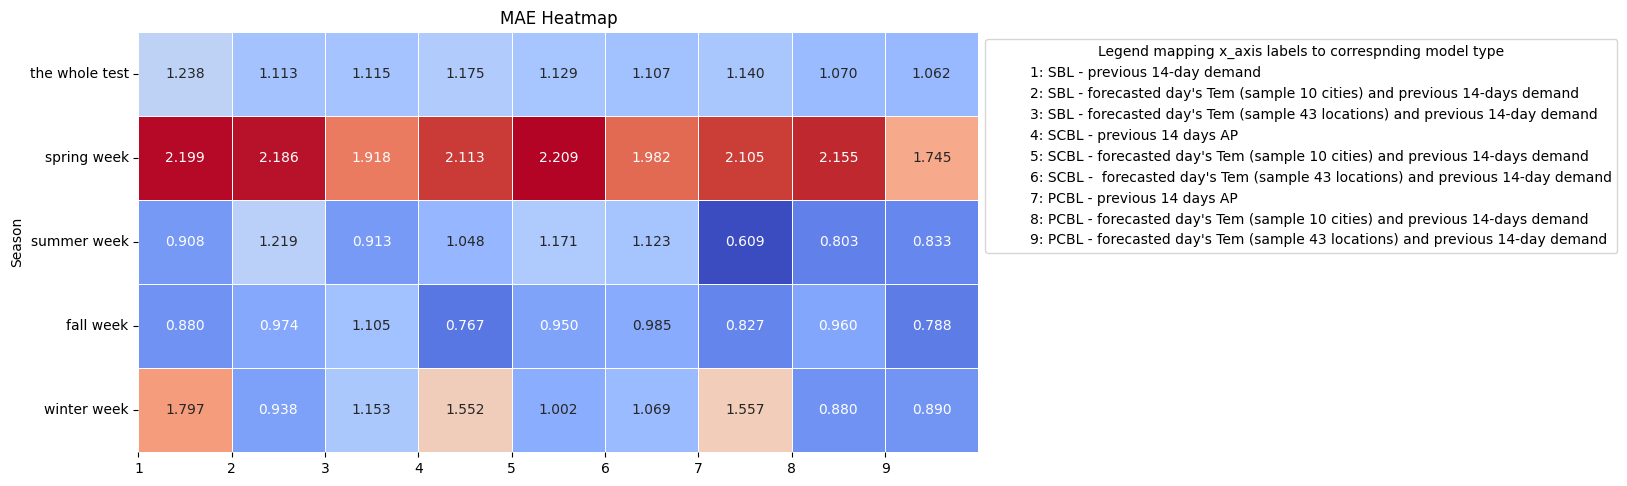

In [115]:
#Extracting RMSE data and saving it on a separate dataframe
rmse_df = df[df['Metric'].str.contains('MAE')]
# Drop the metric column
rmse_df = rmse_df.drop(rmse_df.columns[1], axis=1)
# Set the 'Season' column as the index
rmse_df.set_index('Season', inplace=True)

#Extract the column names to create a legend hence proper image
df_columns = list(rmse_df.columns)

# Create the heatmap using fig, ax with a larger canvas
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

# Customize the size and position of the heatmap within the axes
ax.set_position([0.1, 0.2, 0.7, 0.7])  # [left, bottom, width, height]

# Customize the heatmap using Seaborn
heatmap = sns.heatmap(rmse_df, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5, cbar = False, ax = ax,cbar_kws={'shrink': 0.3,'pad': 0.02,})

# Set numeric labels on the x-axis
ax.set_xticks(range(len(rmse_df.columns)))
ax.set_xticklabels(range(1, len(rmse_df.columns) + 1), rotation=0, ha = 'center')

# Create a custom legend to map numeric labels to string labels
legend_elements = [Patch(facecolor='white', edgecolor='white', label=f"{i + 1}: {col}") for i, col in enumerate(rmse_df.columns)]
ax.legend(handles=legend_elements, title='Legend mapping x_axis labels to correspnding model type', loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title('MAE Heatmap')
plt.show()

Mean Absolute Percentage Error

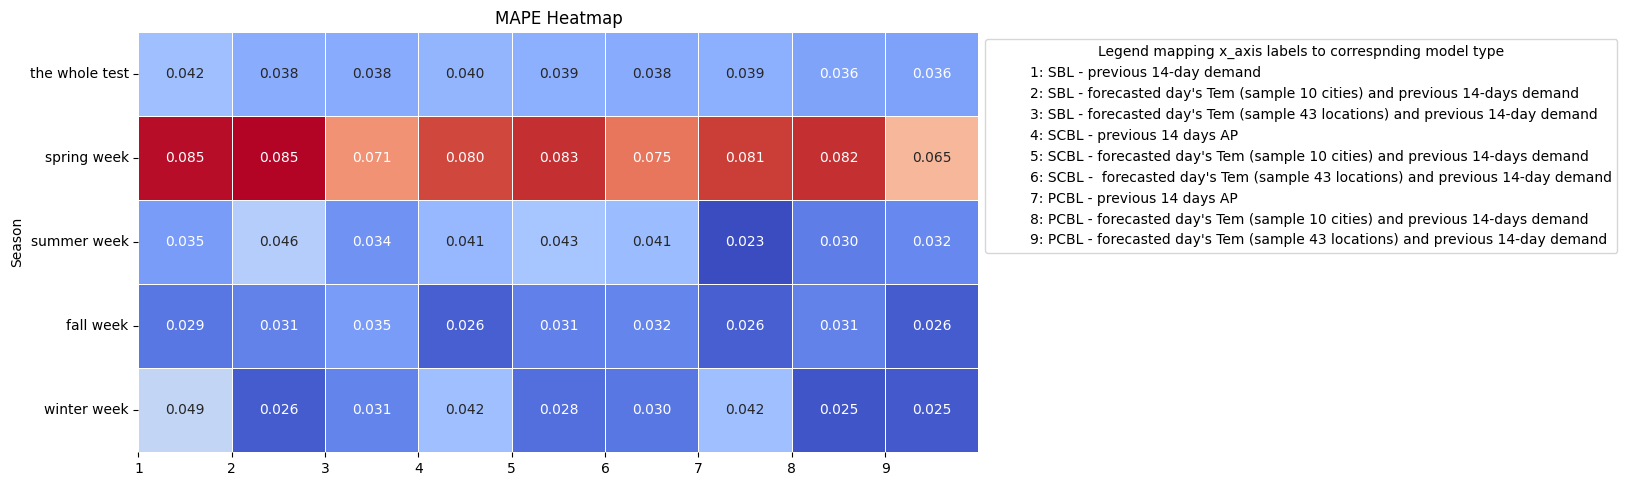

In [116]:
#Extracting RMSE data and saving it on a separate dataframe
rmse_df = df[df['Metric'].str.contains('MAPE')]
# Drop the metric column
rmse_df = rmse_df.drop(rmse_df.columns[1], axis=1)
# Set the 'Season' column as the index
rmse_df.set_index('Season', inplace=True)

#Extract the column names to create a legend hence proper image
df_columns = list(rmse_df.columns)

# Create the heatmap using fig, ax with a larger canvas
fig, ax = plt.subplots(figsize=(12, 6))  # Increase the figure size

# Customize the size and position of the heatmap within the axes
ax.set_position([0.1, 0.2, 0.7, 0.7])  # [left, bottom, width, height]

# Customize the heatmap using Seaborn
heatmap = sns.heatmap(rmse_df, cmap='coolwarm', annot=True, fmt='.3f', linewidths=0.5, cbar = False, ax = ax,cbar_kws={'shrink': 0.3,'pad': 0.02,})

# Set numeric labels on the x-axis
ax.set_xticks(range(len(rmse_df.columns)))
ax.set_xticklabels(range(1, len(rmse_df.columns) + 1), rotation=0, ha = 'center')

# Create a custom legend to map numeric labels to string labels
legend_elements = [Patch(facecolor='white', edgecolor='white', label=f"{i + 1}: {col}") for i, col in enumerate(rmse_df.columns)]
ax.legend(handles=legend_elements, title='Legend mapping x_axis labels to correspnding model type', loc='upper left', bbox_to_anchor=(1, 1))

ax.set_title('MAPE Heatmap')
plt.show()

Separate personal tests

In [48]:
#iloc's first argument is the row number. Second is the column number
row_0 = df.iloc[0]
print(row_0)

#iloc's first argument is the row number. Second is the column number
col_0 = df.iloc[:,0]
print(col_0)

Season                                                                           the whole test
Metric                                                                                RMSE (GW)
SBL - previous 14-day demand                                                           1.674537
SBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand              1.579113
SBL - forecasted day's Tem (sample 43 locations) and previous 14-day demand            1.566955
SCBL - previous 14 days AP                                                             1.578448
SCBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand             1.599343
SCBL -  forecasted day's Tem (sample 43 locations) and previous 14-day demand          1.561649
PCBL - previous 14 days AP                                                             1.573301
PCBL - forecasted day's Tem (sample 10 cities) and previous 14-days demand              1.50924
PCBL - forecasted day's Tem (sample 43 l